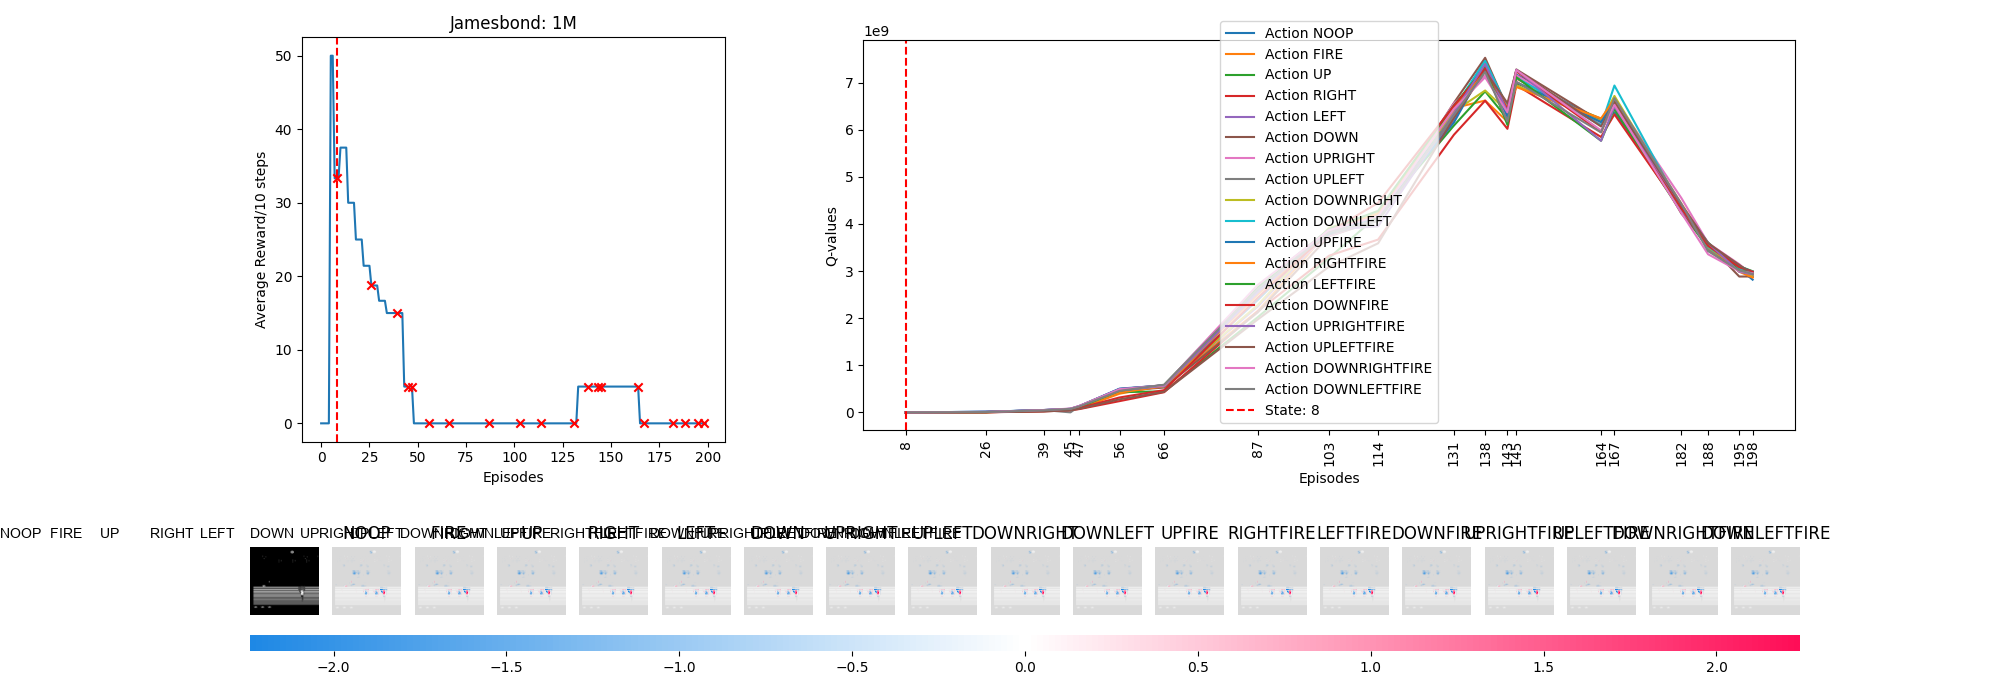

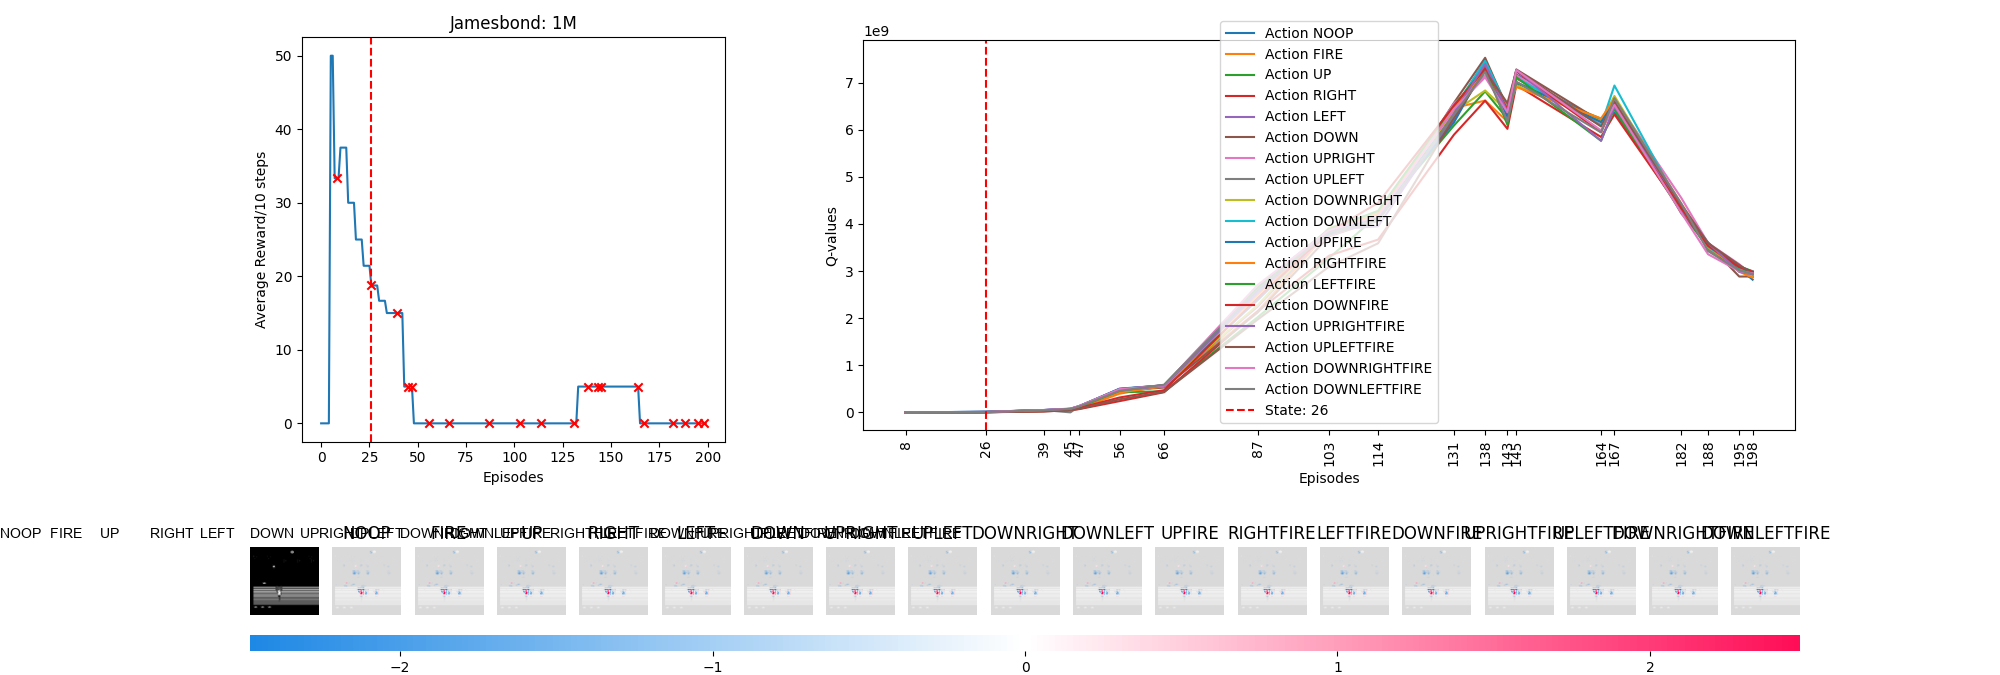

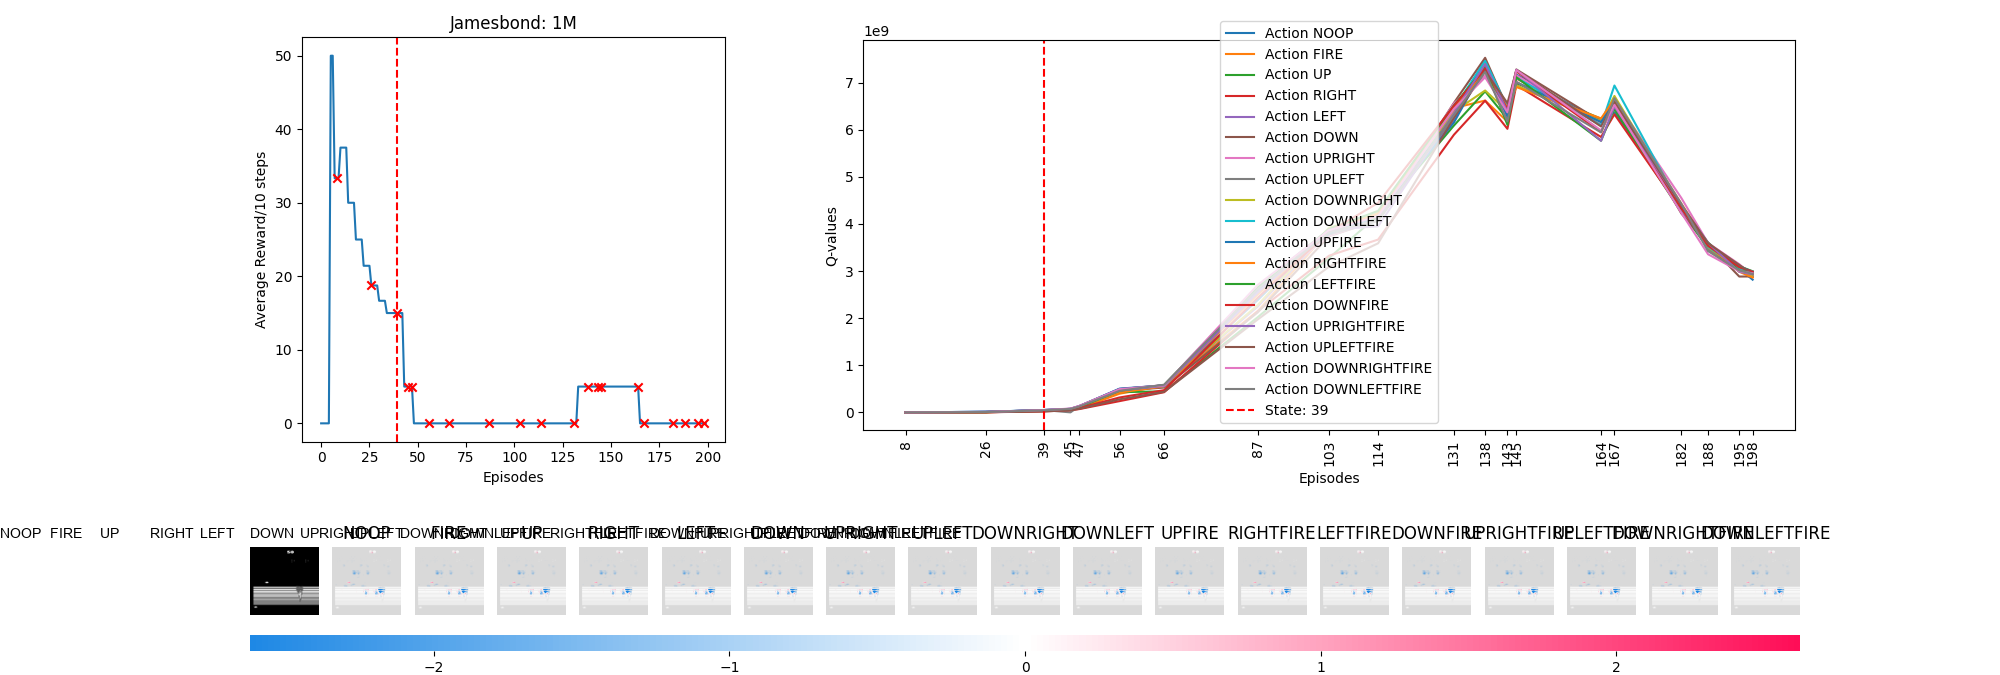

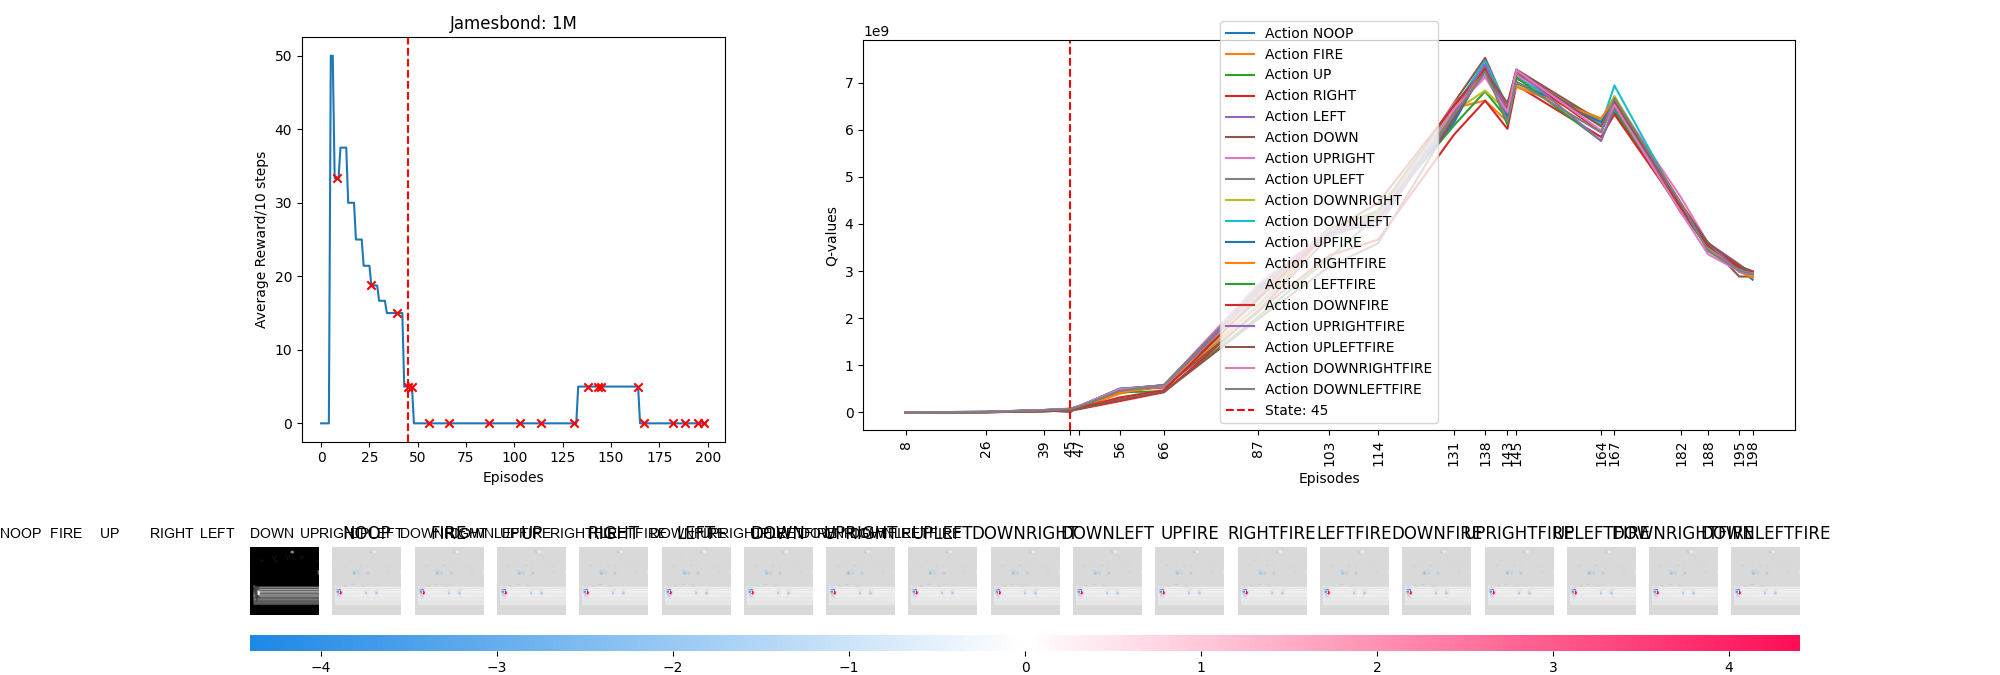

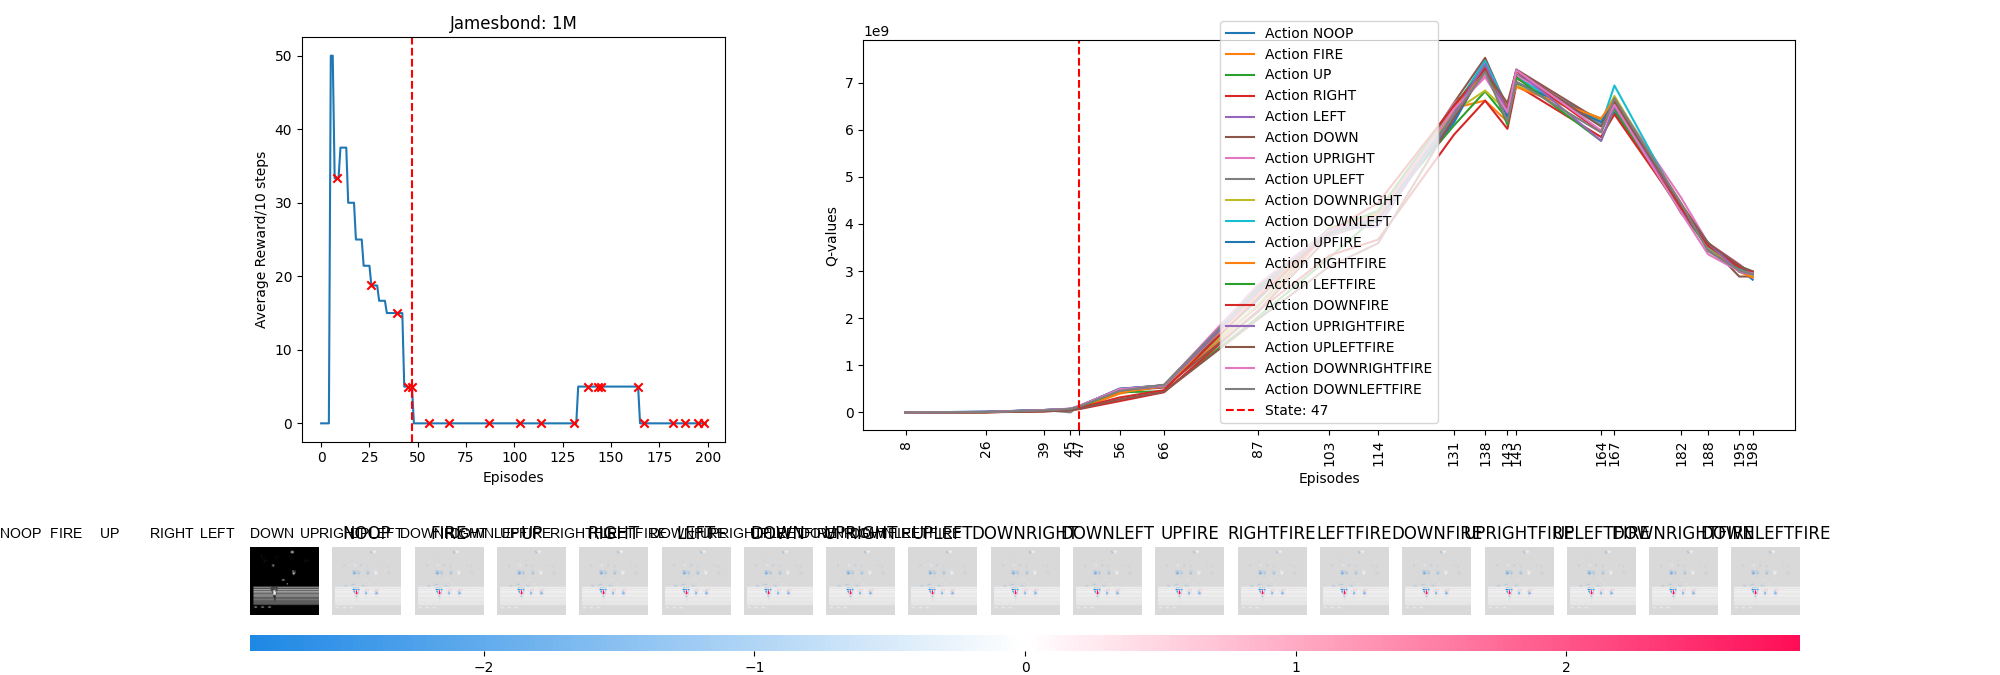

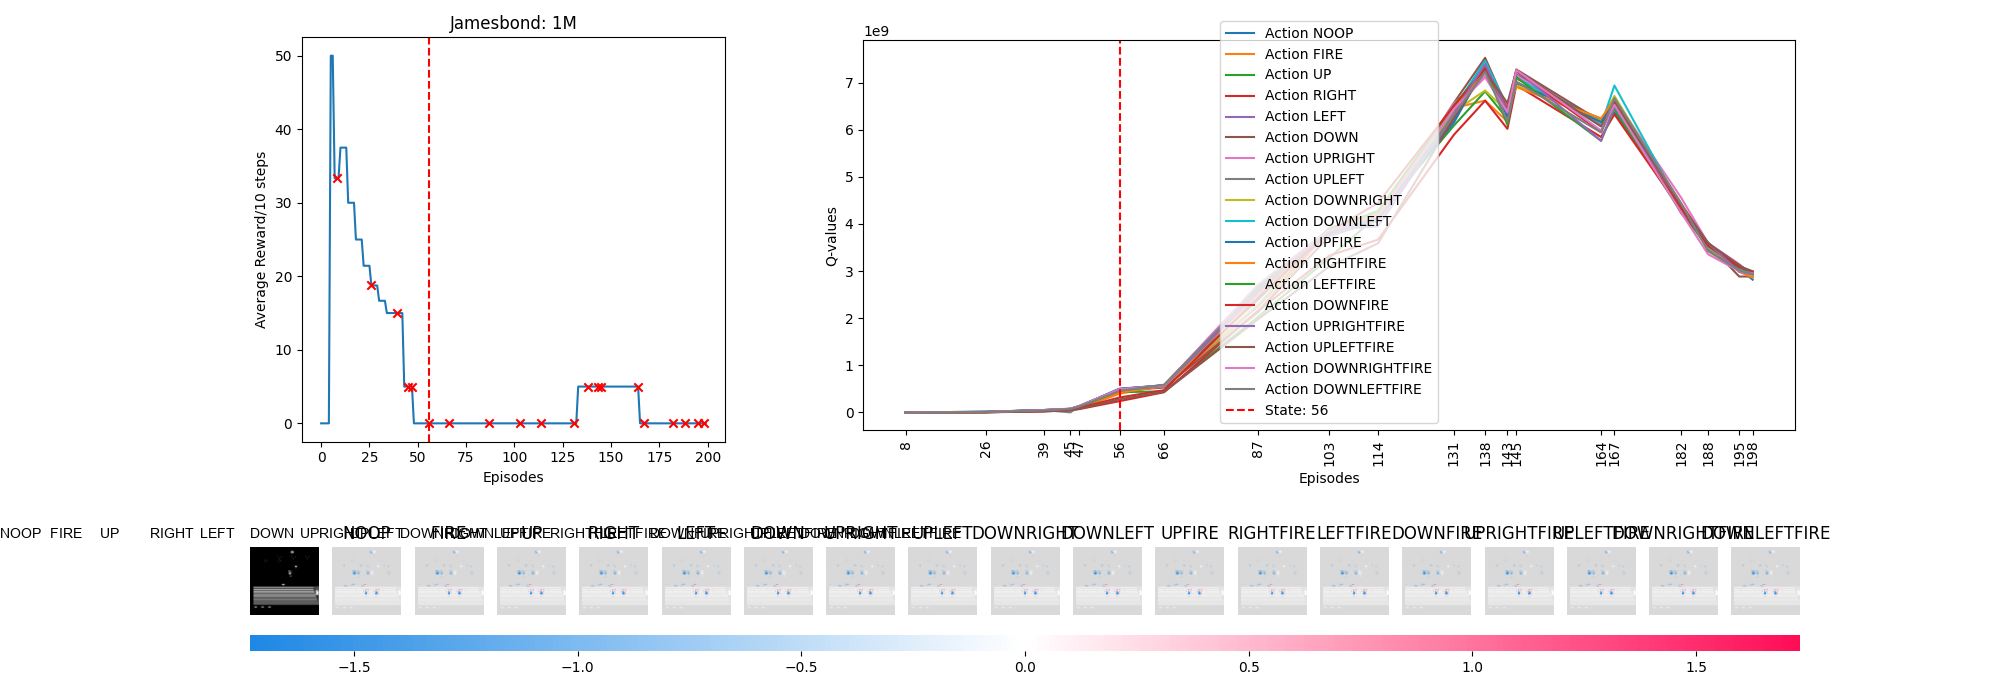

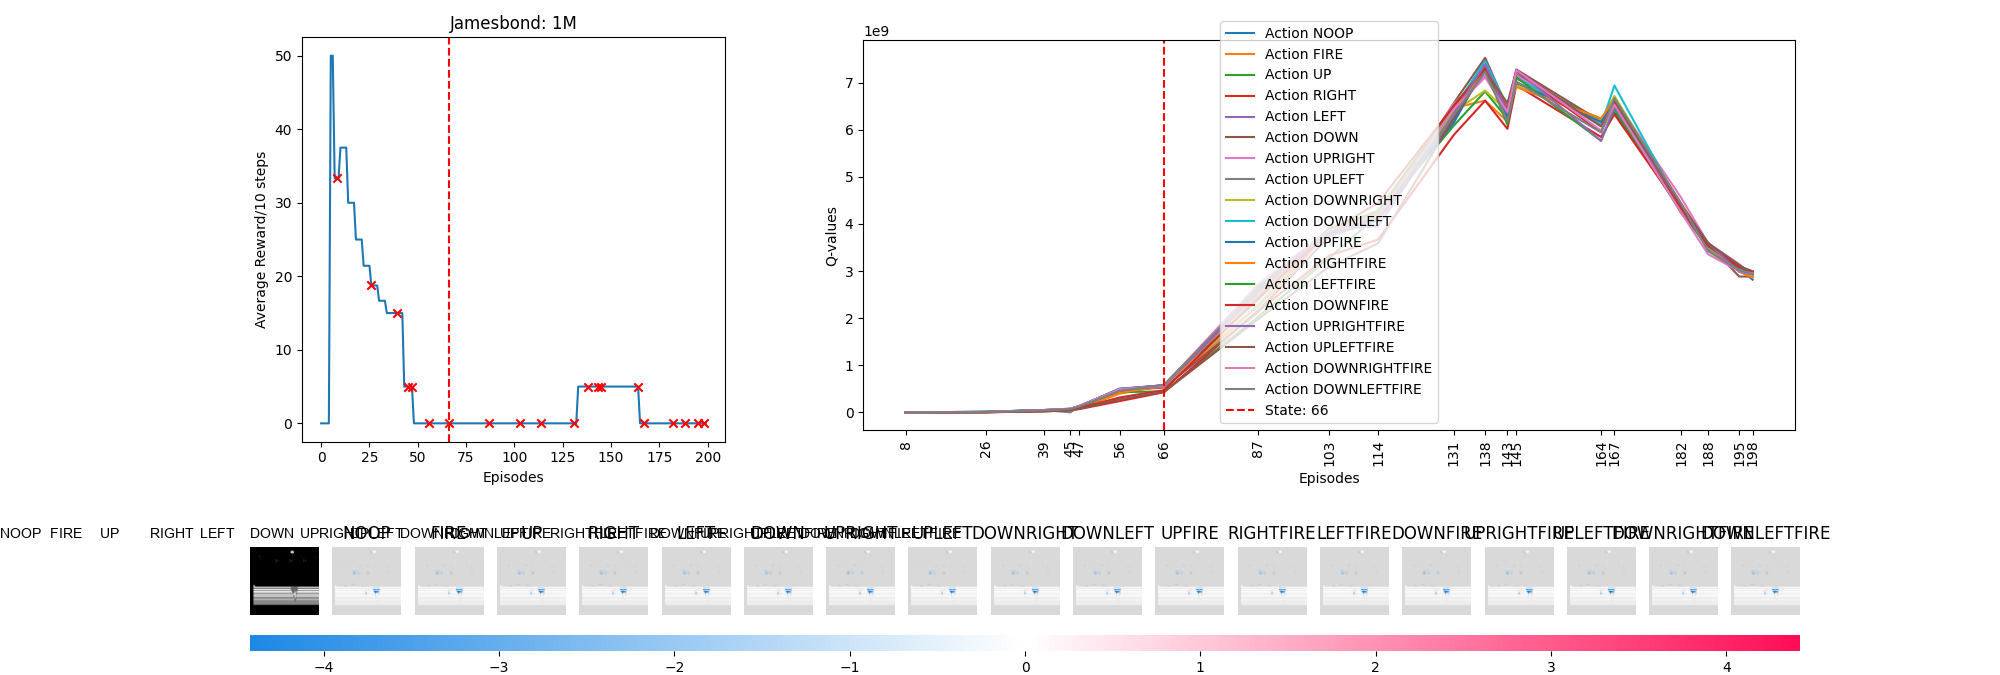

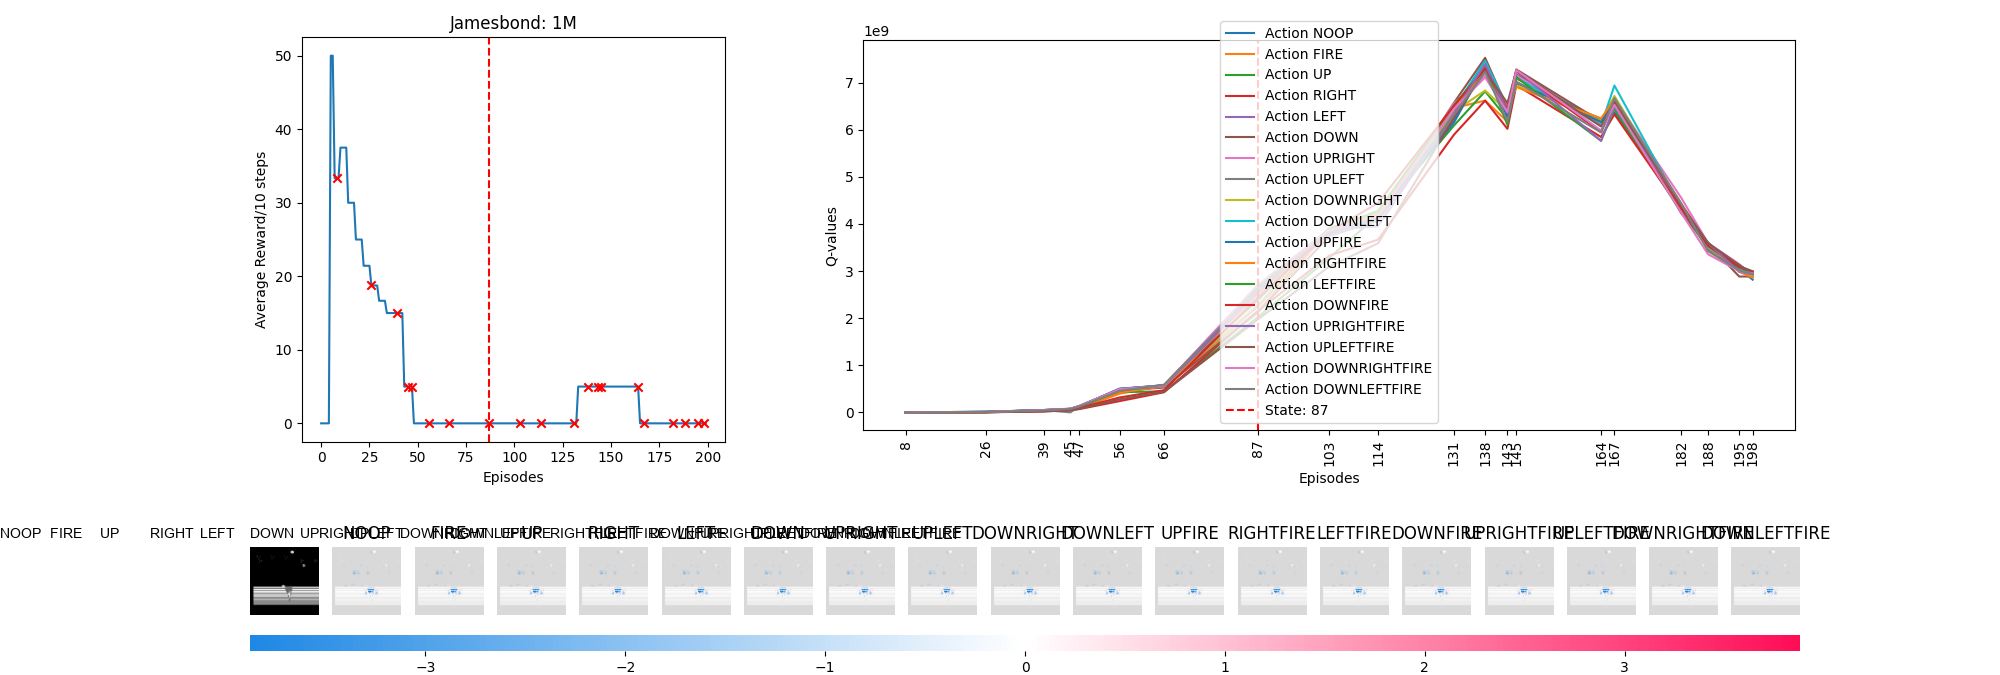

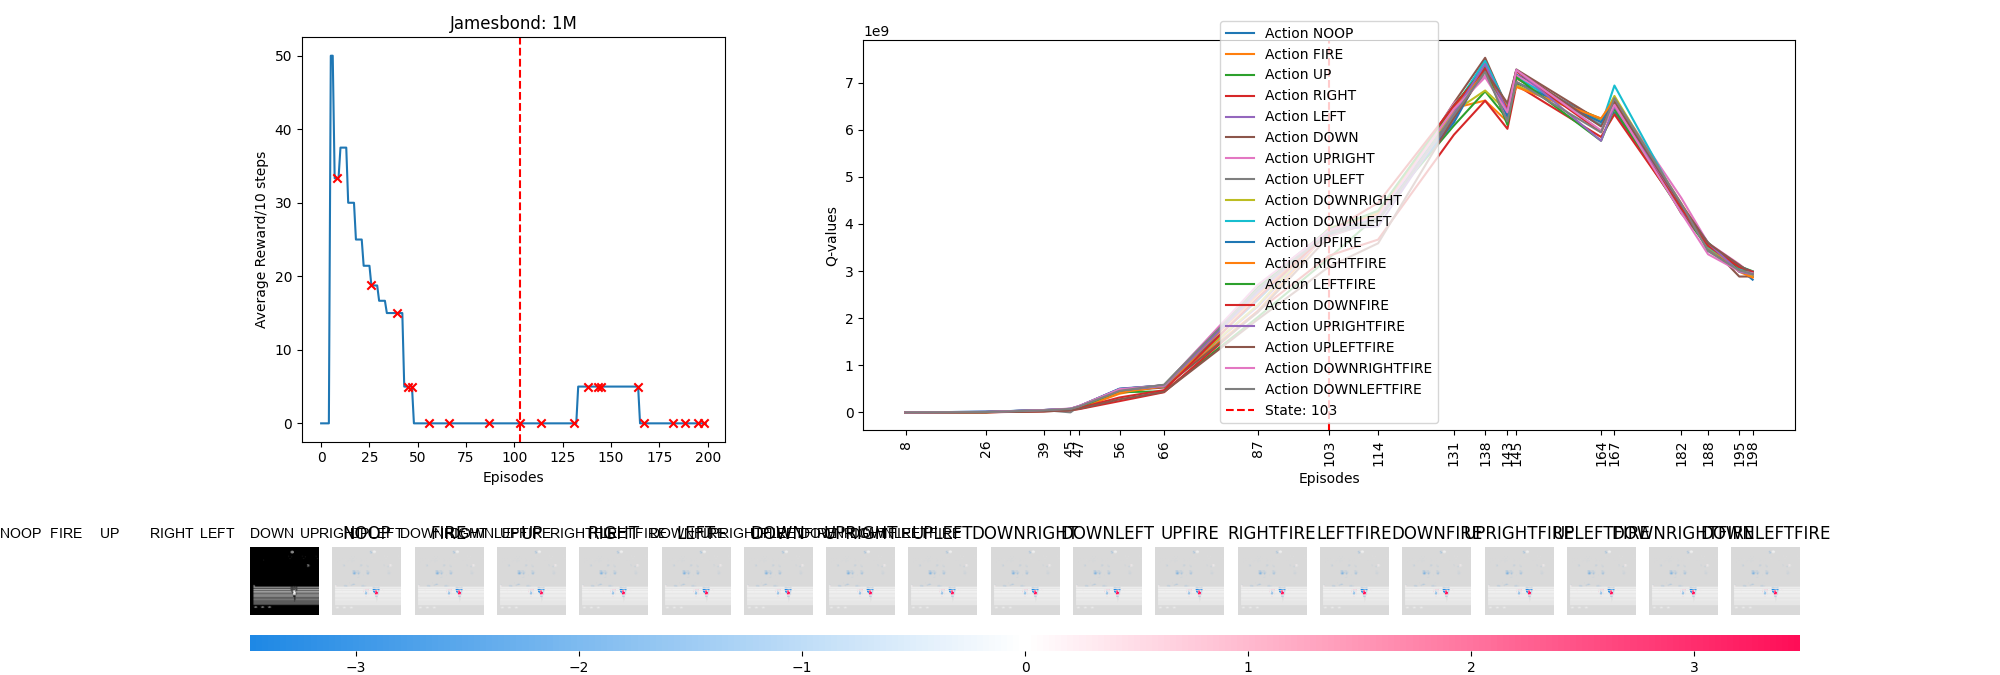

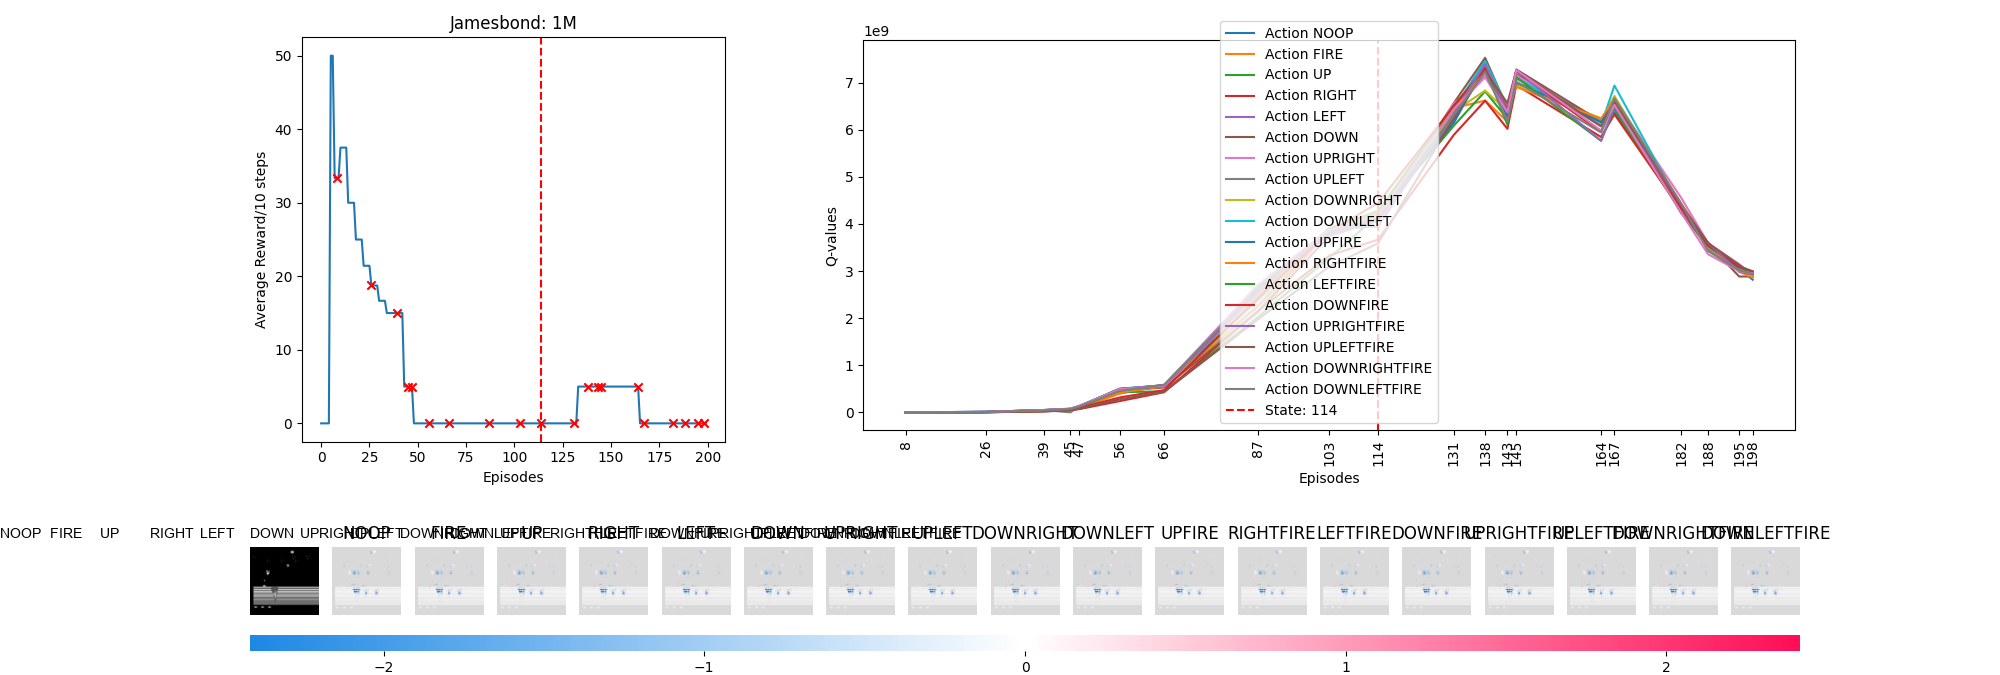

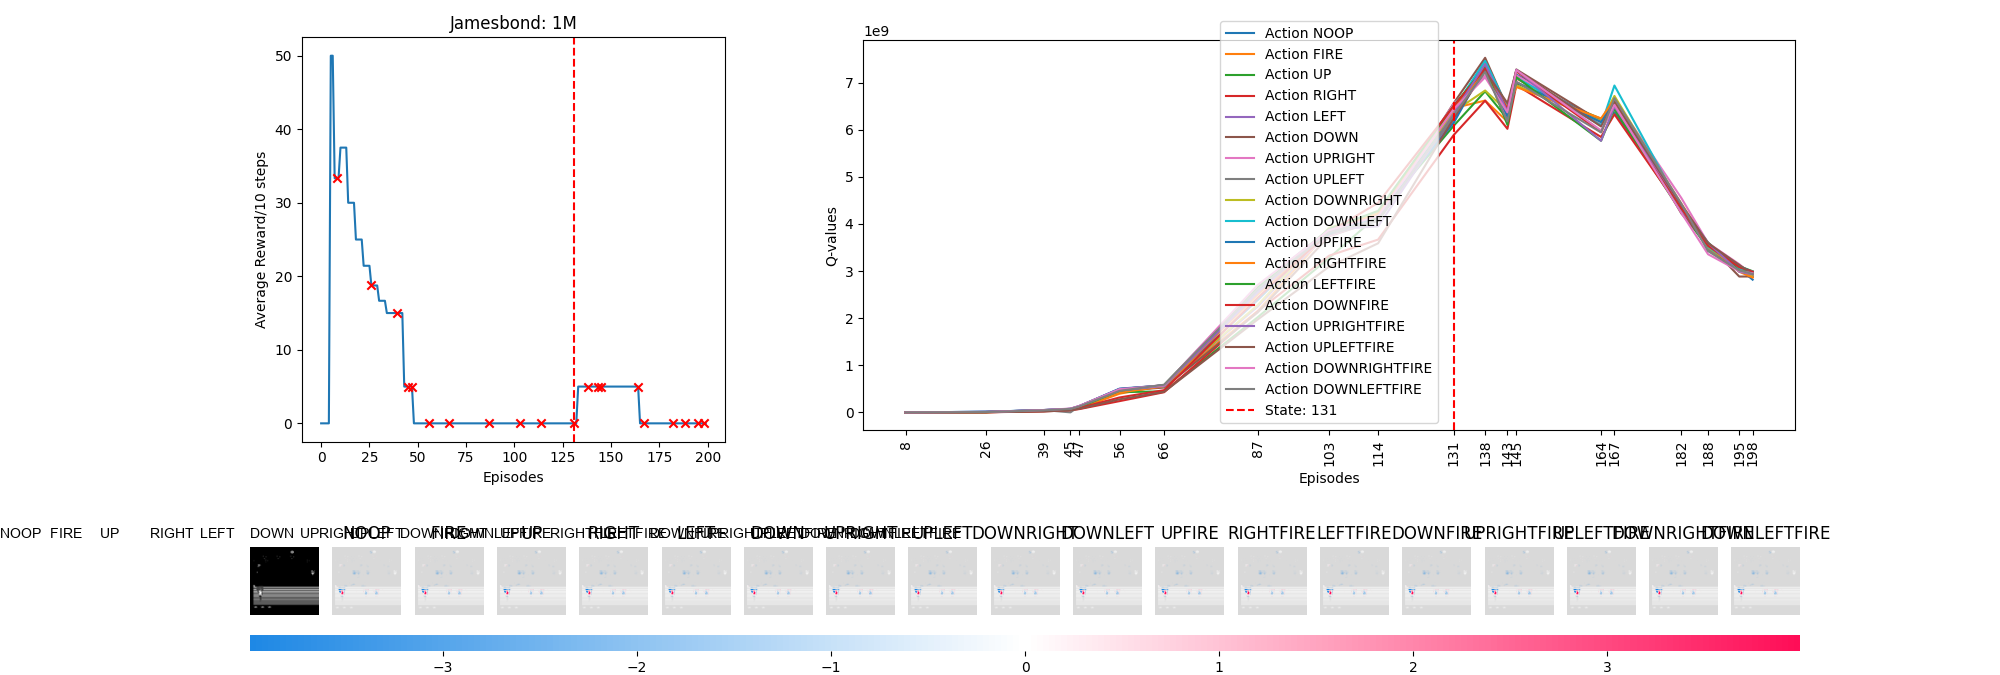

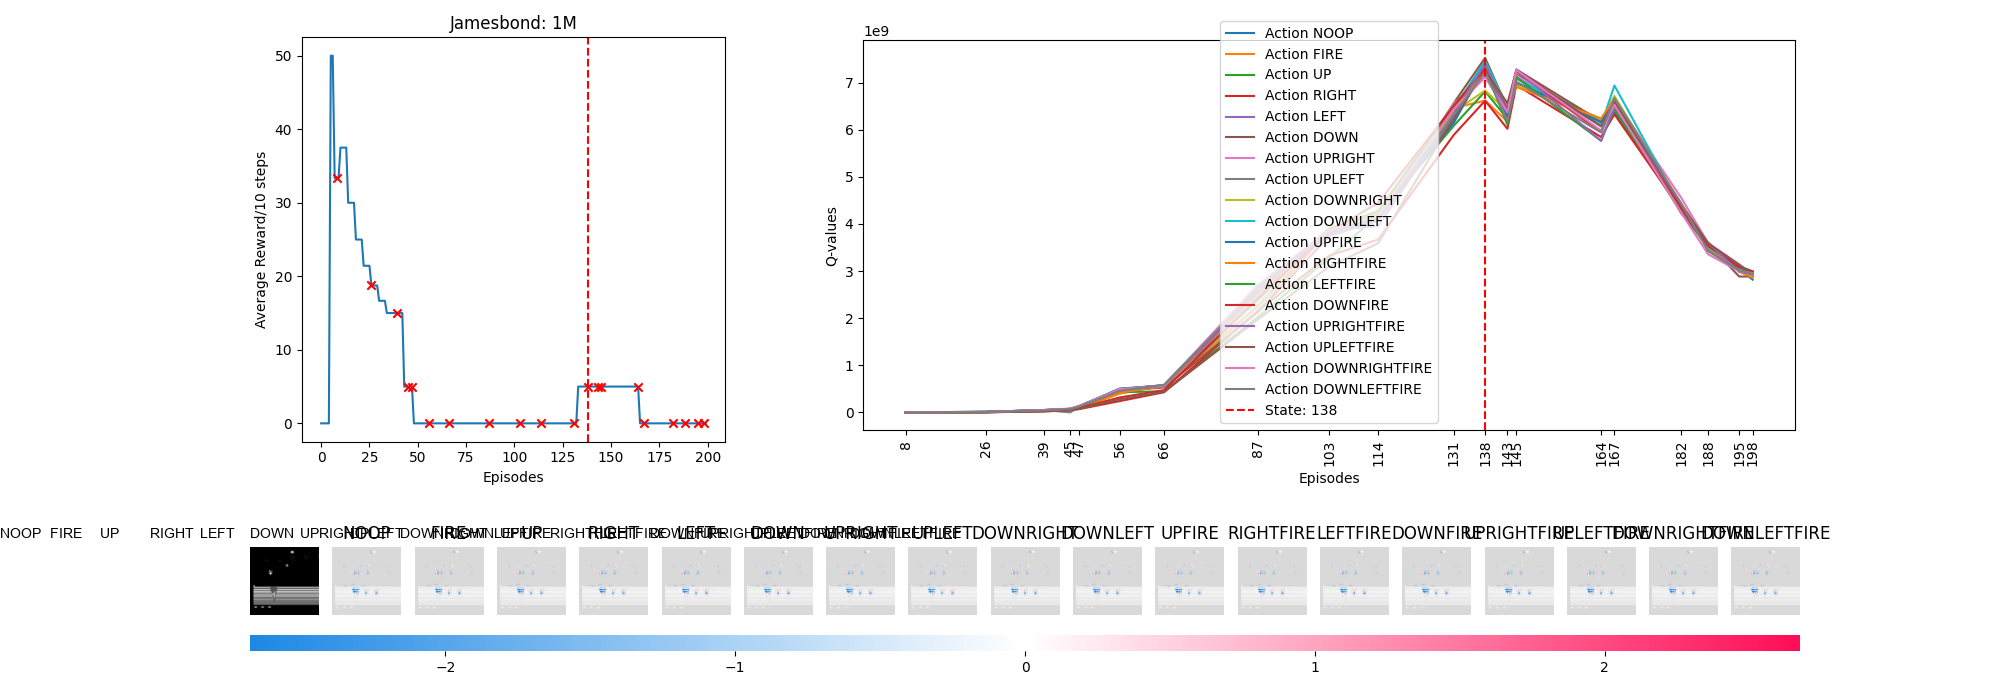

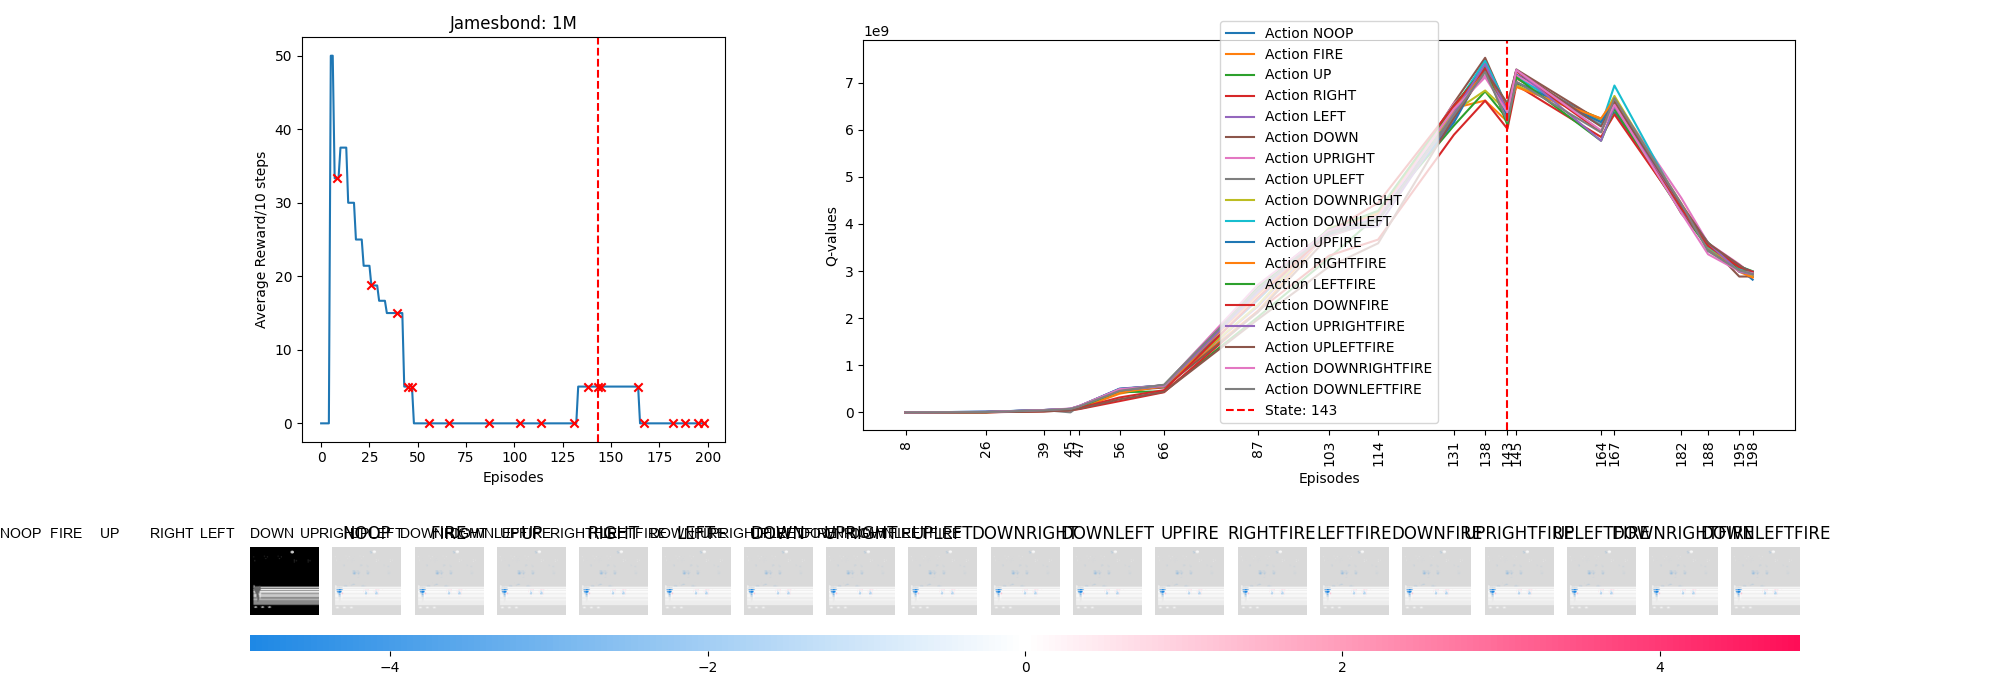

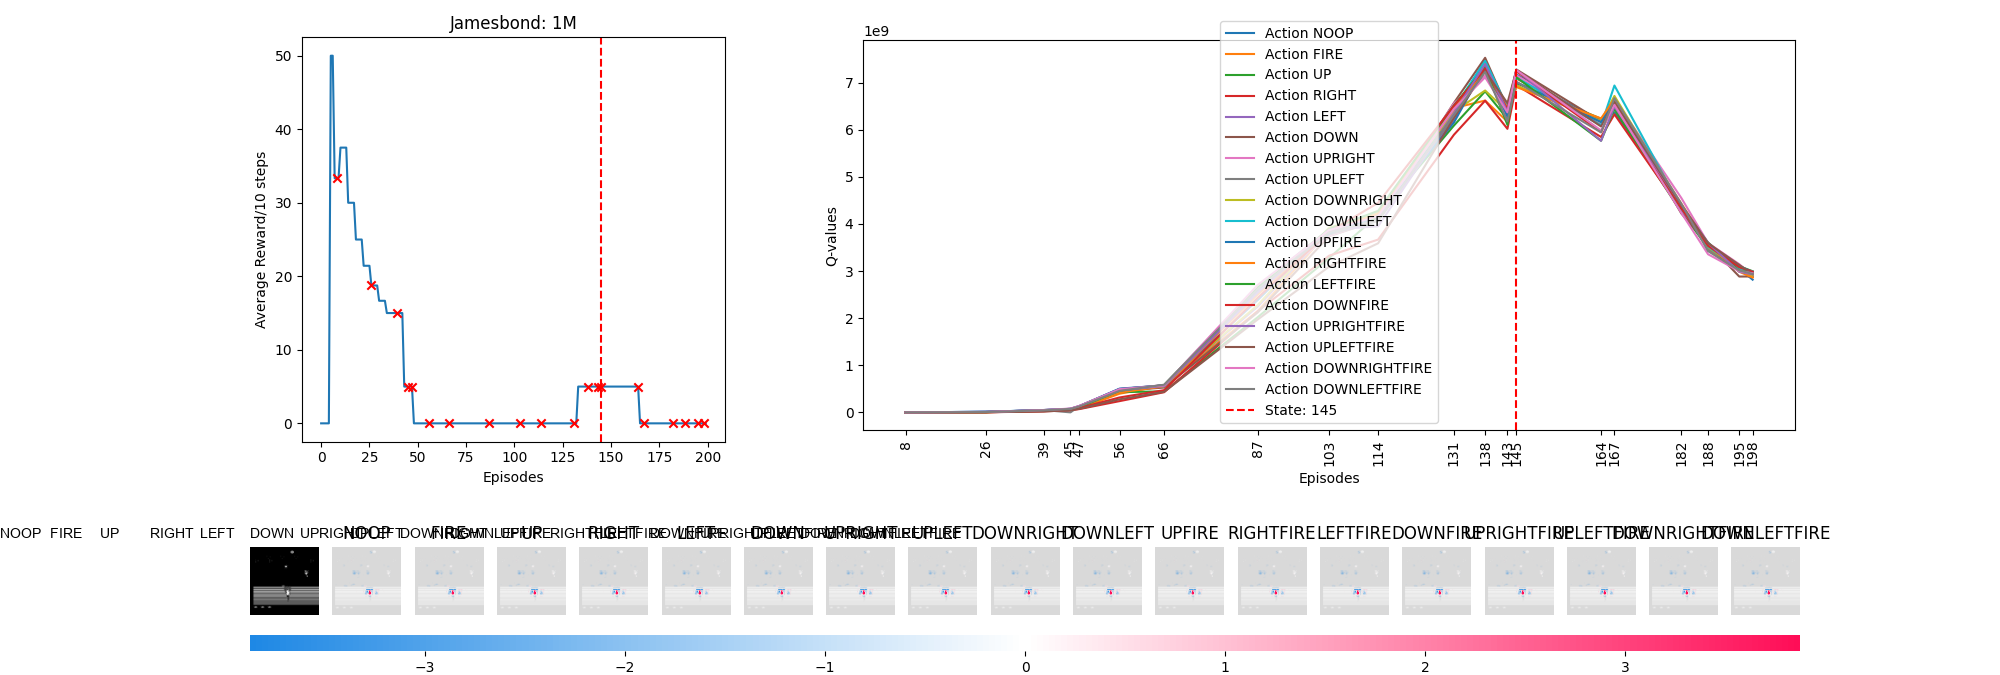

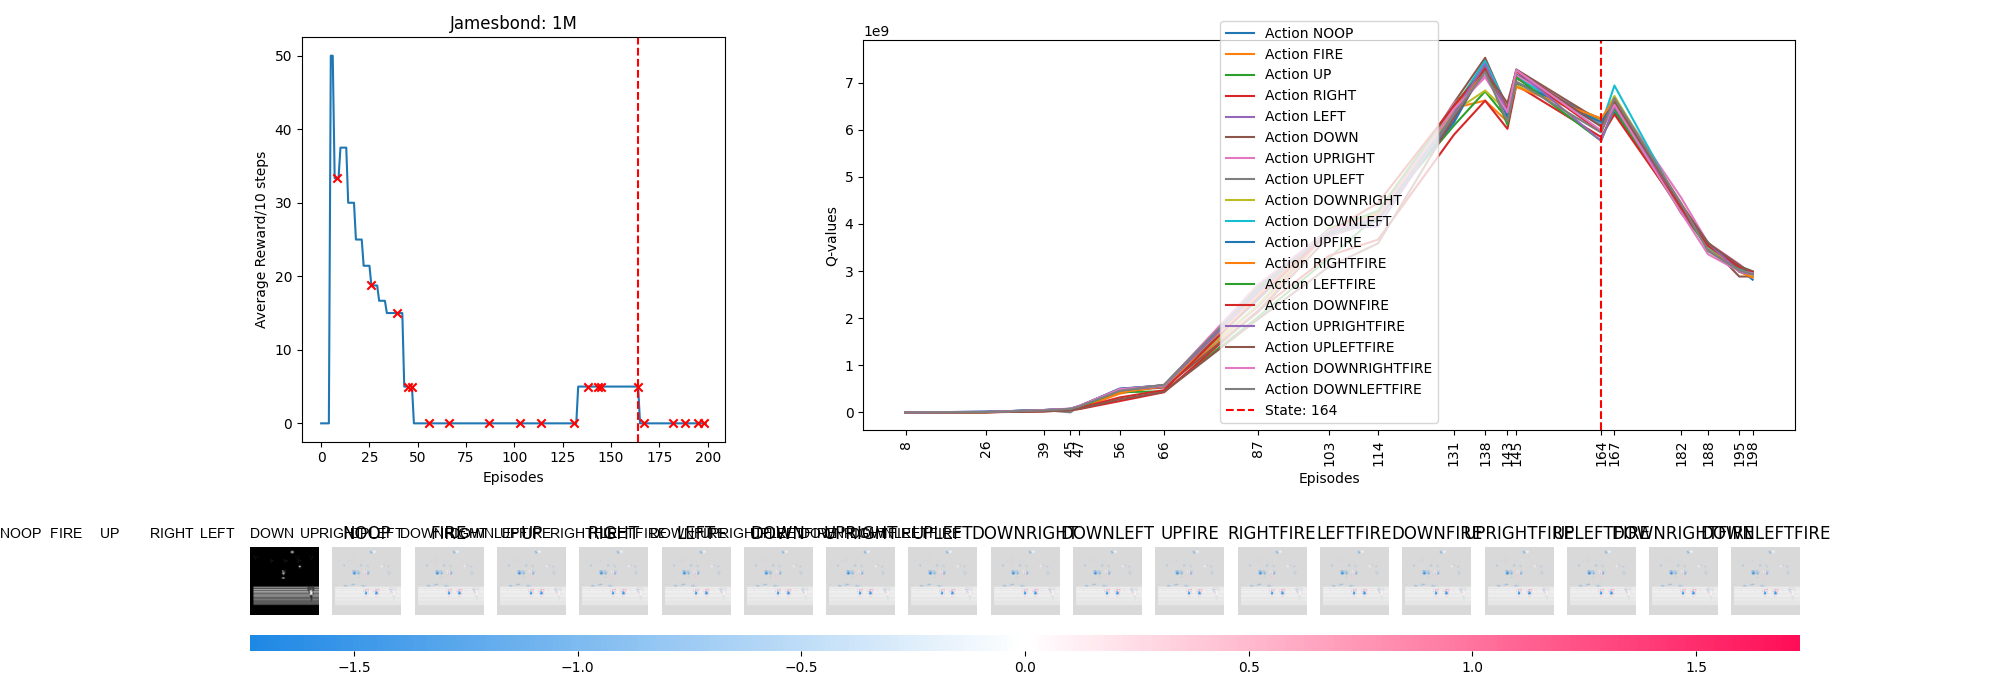

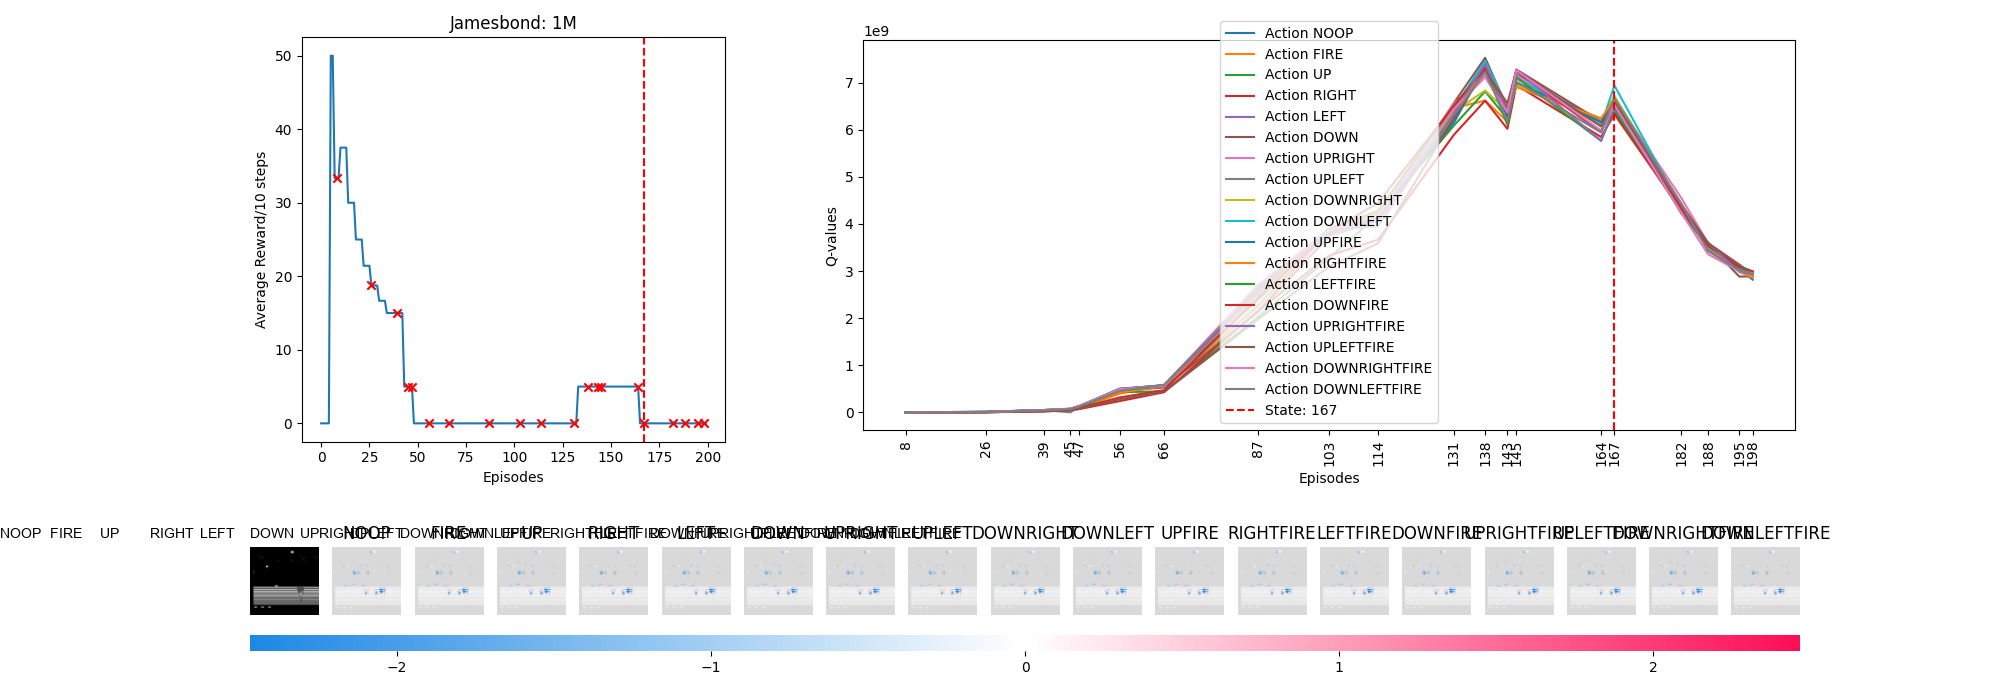

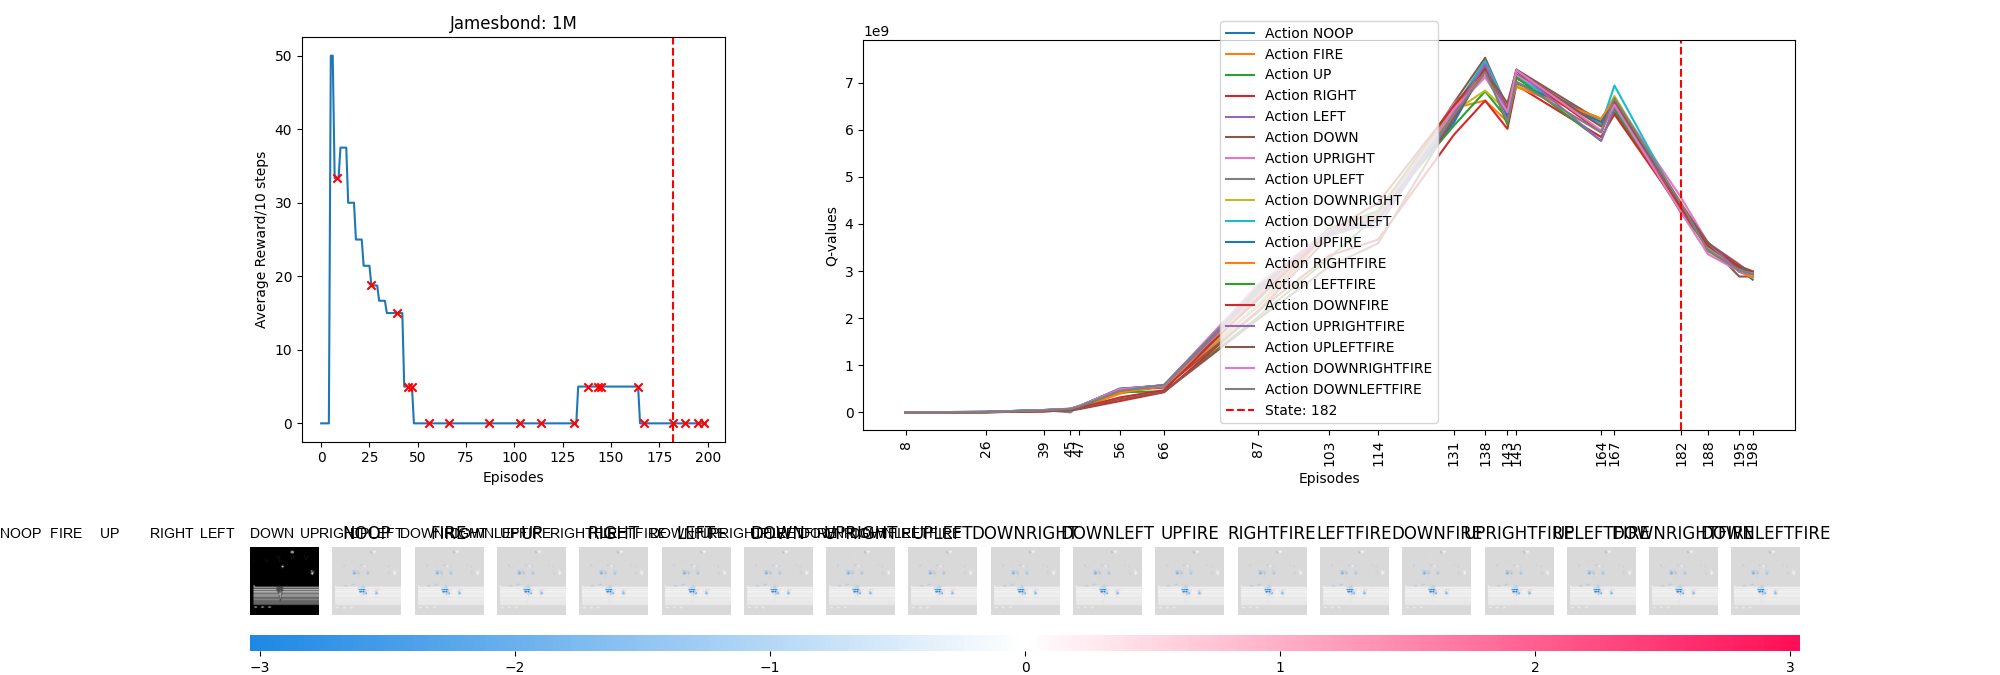

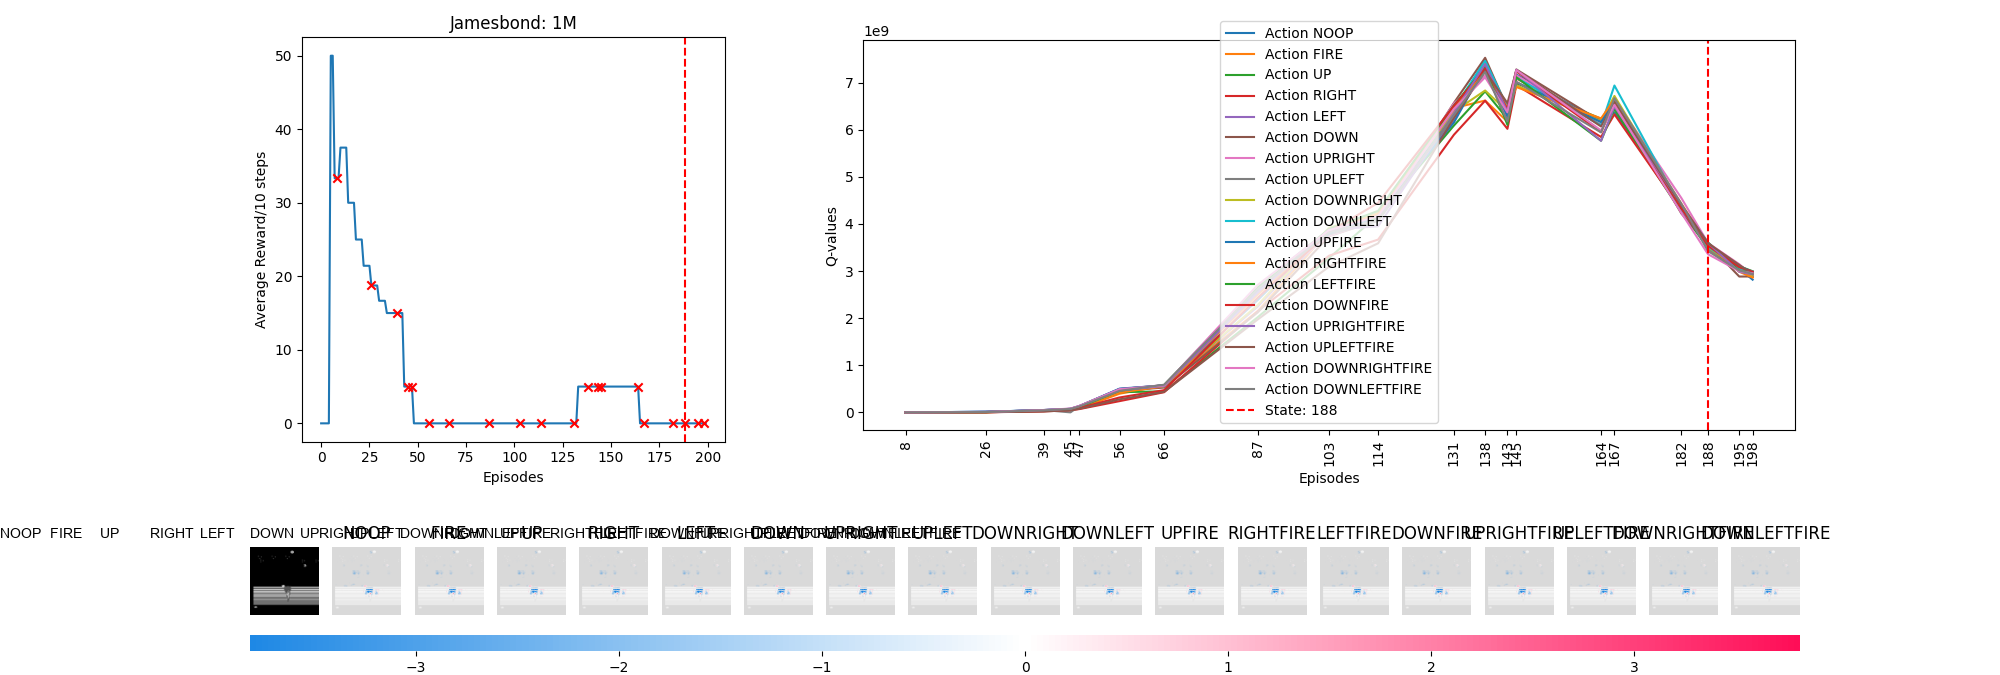

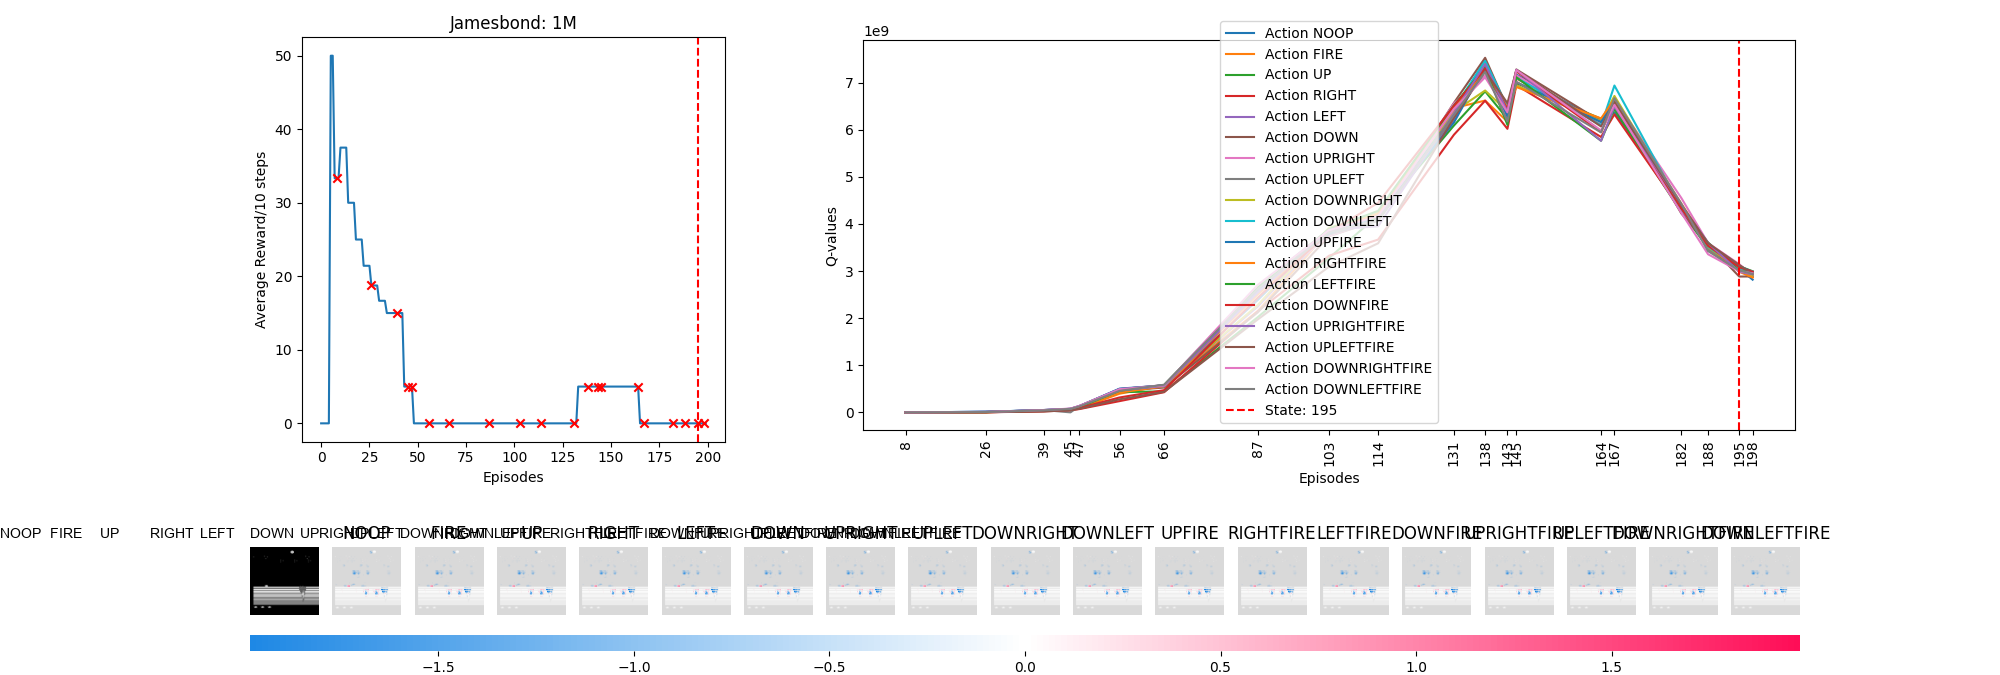

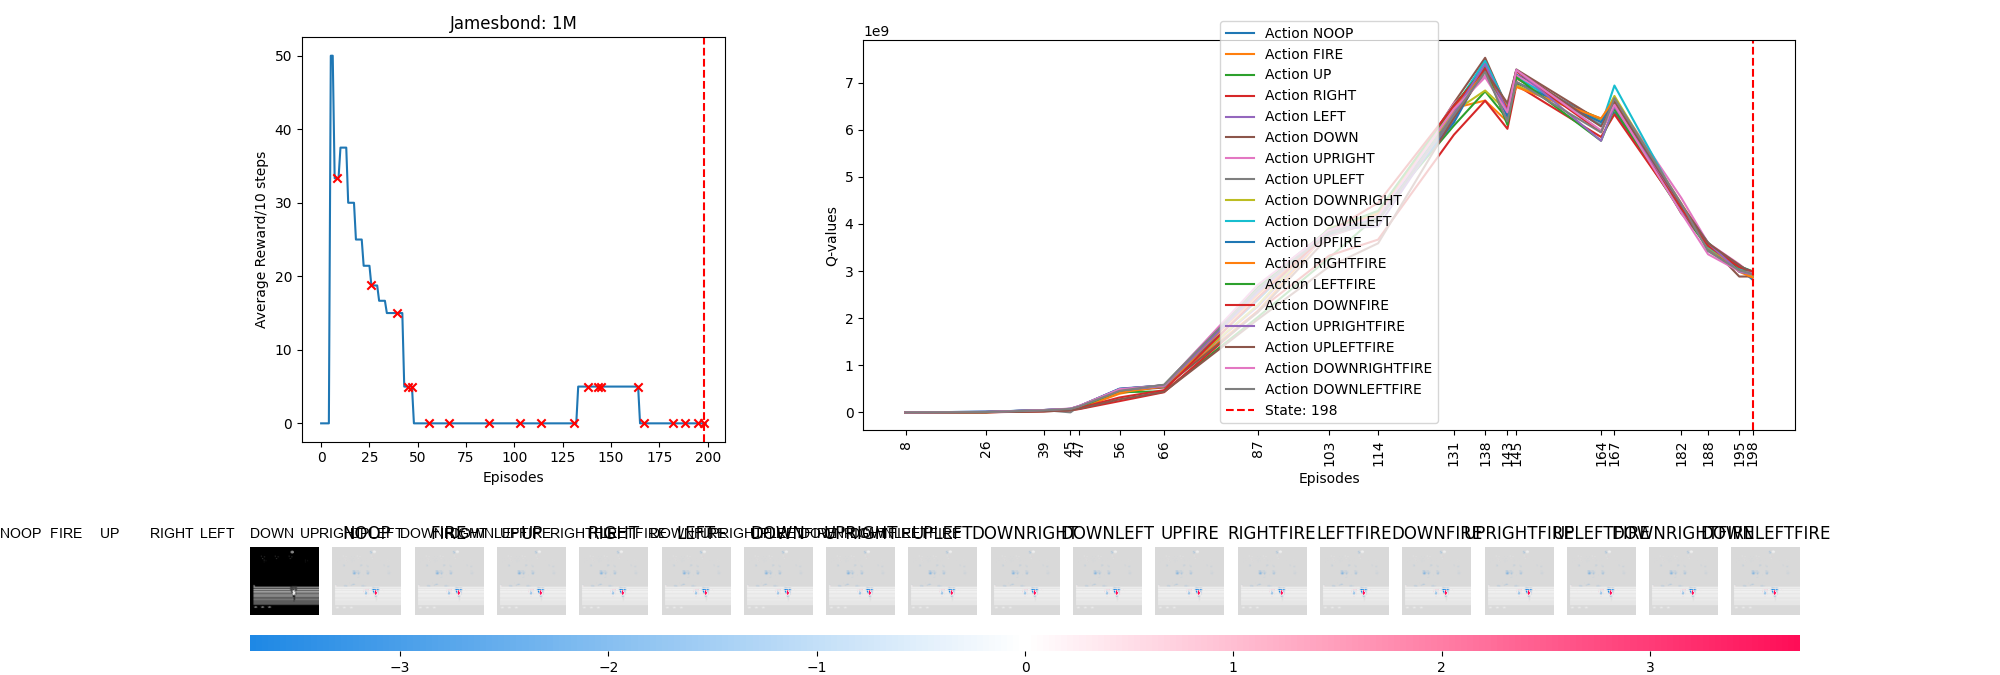

In [25]:
#CREATE SHAP GIF
from PIL import Image, ImageDraw, ImageFont
import pandas as pd
df = pd.read_csv('.\..\plots\shapexplainer\plots.csv')

"""
filenames = ['ale_airraid-v5', 
'ale_asterix-v5', 
'ale_asteroids-v5', 
'ale_bowling-v5', 
'ale_breakout-v5',

filenames = ['ale_demonattack-v5',
'ale_freeway-v5',
'ale_gravitar-v5',
'ale_jamesbond-v5',
'ale_montezumarevenge-v5',
'ale_mspacman-v5',
'ale_pong-v5',
'ale_privateeye-v5',
'ale_qbert-v5',
'ale_seaquest-v5',
'ale_spaceinvaders-v5']


filenames = ['ale_venture-v5',
'ale_wizardofwor-v5',
'ale_yarsrevenge-v5',
'ale_zaxxon-v5']
"""

filenames = ['ale_jamesbond-v5']
""",
'ale_montezumarevenge-v5',
'ale_privateeye-v5',
'ale_gravitar-v5',
'ale_seaquest-v5',
'ale_venture-v5',
'ale_yarsrevenge-v5',
'ale_zaxxon-v5']
"""
labels = ['1M']#, '500k', '100k', '50k', '10k', '5k', '1k', '500']
# List to store frames for the GIF

meaning = ["NOOP", "FIRE", "UP", "RIGHT", "LEFT", "DOWN", "UPRIGHT", "UPLEFT", "DOWNRIGHT", "DOWNLEFT",
                "UPFIRE", "RIGHTFIRE", "LEFTFIRE", "DOWNFIRE", "UPRIGHTFIRE", "UPLEFTFIRE", "DOWNRIGHTFIRE", "DOWNLEFTFIRE"]

# Load a font for text overlay
font = ImageFont.truetype("arial.ttf", 14)


for filename in filenames:
    for label in labels:
        # List to store frames for the GIF
        gif_frames = []

        episodes_df = df[(df['filename'] == filename) & (df['label'] == label)]
        test_episodes = episodes_df['episode'].tolist()
        test_episodes.sort()

        for test_episode in test_episodes:
            # Load images
            reward_sample = Image.open('./../plots/rewardtest/' + filename +'_' + str(label) +'_reward_ep_' + str(test_episode) +'.png') 
            q_values = Image.open('./../plots/qvalueplots/' + filename +'_' + str(label) + '_qvalues_ep_' + str(test_episode) +'.png')
            shap_values = Image.open('./../plots/shap/' + filename + '_' + str(label) +'_shap_ep_' + str(test_episode) + '.png')


            # Get dimensions of input images
            rs_width, rs_height = reward_sample.size  # Assuming the square images have the same dimensions
            qv_width, qv_height = q_values.size
            s_width, s_height = shap_values.size
            new_width = s_width
            new_height = (qv_height + s_height)

            # Create a new image with the calculated dimensions
            new_image = Image.new('RGB', (new_width, (new_height)), (255, 255, 255))


            # Paste the square images on top
            new_image.paste(reward_sample, (240, 0))
            new_image.paste(q_values, (310 + s_width - rs_width - qv_width, 1))

            # Paste the landscape image on the bottom
            new_image.paste(shap_values, (0, qv_height))
            
            # Add text overlay
            x = 0
            y = qv_height + 25

            for m in meaning:
                draw = ImageDraw.Draw(new_image)
                text = m
                draw.text((x, y), text, fill=(0, 0, 0), font=font)
                x += 50

            # Save the new image
            #new_image.save('./../plots/shapexplainer2/'+ filename +'_'+ str(label) +'_ep_' + str(test_episode) +'.png')

            #pil_image = Image.open('images/thumbnail.webp')
            display(new_image)

            #add image to gif array
            gif_frames.append(new_image)

        # Save the list of frames as a GIF
        #gif_frames[0].save('./../plots/shapexplainer2/'+ filename +'_'+ str(label) +'_shap.gif', save_all=True, append_images=gif_frames[1:], loop=0, duration=300)
        #gif_frames[0].show()